# Code examples to help with Lab 04

In [1]:
from datascience import *
import numpy as np

# needed for plotting with datascience module
%matplotlib inline
import matplotlib.pyplot as plots
#plots.style.use('fivethirtyeight')

from IPython.display import display, Image

In [2]:
ranking = Table.read_table("data/world_university_rankings.csv")

In [4]:
ranking

rank,ranking-institution-title,location,Overall scores,Research Quality Score,Industry Score,International Outlook,Research Environment Score,Teaching Score
1,Massachusetts Institute of Technology,United States,94.8,92.2,99.9,89.6,96.5,96
2,Stanford University,United States,93.1,91.9,100,83.5,91.8,98.2
3,University of Oxford,United Kingdom,91.3,81.7,89.4,94.5,97.4,93.5
4,"University of California, Berkeley",United States,90.6,95.2,90.6,83.5,92.7,91.1
5,Peking University,China,90.4,74.5,95.4,94,91.8,96.3
6,Tsinghua University,China,89.6,82.5,99.5,77.7,95.2,93.2
7,University of Cambridge,United Kingdom,89.4,86.6,76.7,95.4,94.6,93.8
8,ETH Zurich,Switzerland,88.3,87.1,99.5,96.4,83.1,75.2
9,Harvard University,United States,87.1,95.2,69.8,82.1,93.4,95
10,National University of Singapore,Singapore,86.8,79.7,97.9,80.4,95.9,79.9


### `are.contained_in` and `are.containing`

In [ ]:
# lists everything that has "United" in it
ranking.where("location", are.containing("United"))

In [ ]:
ivies = ["Harvard University", "Yale University", "Columbia University"]

In [ ]:
# lists everything that's in ivies
ranking.where("ranking-institution-title", are.contained_in(ivies))

### `tbl.group(column_or_columns, func)`

`func` is how you want to aggregate values

In [5]:
teaching = ranking.select("location", "Teaching Score")
teaching

location,Teaching Score
United States,96
United States,98.2
United Kingdom,93.5
United States,91.1
China,96.3
China,93.2
United Kingdom,93.8
Switzerland,75.2
United States,95
Singapore,79.9


In [6]:
# group gives counts by default
teaching.group("location")

location,count
Australia,34
Austria,5
Bangladesh,2
Belgium,8
Brazil,23
Brunei Darussalam,1
Canada,28
Chile,3
China,60
Colombia,5


In [7]:
# it can do other things, like get the max of all scores for a single location
teaching.group("location", max)

location,Teaching Score max
Australia,59.2
Austria,41.6
Bangladesh,15.6
Belgium,45.7
Brazil,53.7
Brunei Darussalam,22.6
Canada,67.2
Chile,20.4
China,96.3
Colombia,22.1


In [8]:
teaching.group("location", min)

location,Teaching Score min
Australia,13.4
Austria,19.9
Bangladesh,10.5
Belgium,15.1
Brazil,11.8
Brunei Darussalam,22.6
Canada,8.6
Chile,13.4
China,9.4
Colombia,11.8


Let's verify the min max result!

In [12]:
# here are the teaching scores for the 5 Austrian universities
teaching.where("location", "Austria")

location,Teaching Score
Austria,41.6
Austria,26.1
Austria,25.4
Austria,19.9
Austria,25.1


In [13]:
min(41.6, 26.1, 25.4, 19.9, 25.1)

19.9

In [14]:
max(41.6, 26.1, 25.4, 19.9, 25.1)

41.6

In [ ]:
# This will work for any function!!!

### `tbl.barh(categories, values)`
#### Bar chart, good for labels that have numerical values

In [15]:
ireland = ranking.where("location", "Ireland")
ireland

rank,ranking-institution-title,location,Overall scores,Research Quality Score,Industry Score,International Outlook,Research Environment Score,Teaching Score
86,Trinity College Dublin,Ireland,64.4,90,67.2,88.3,37.8,38.8
147,University College Dublin,Ireland,58.4,82.2,63.4,84.9,32.5,28.9
250,Dublin City University,Ireland,52.7,93.6,55.8,73.2,22.9,18.2
290,University of Galway,Ireland,50.6,78.8,67.5,65.4,19.5,21.7
329,Maynooth University,Ireland,48.7,69.7,72.2,70,18.2,13.3
424,University of Limerick,Ireland,44.7,58.7,68.1,56.9,20.7,19.3
594,University College Cork,Ireland,37.4,53.2,40.3,53.8,17.7,22.1
626,Technological University Dublin,Ireland,35.9,33.8,68,54.4,8.4,14.8


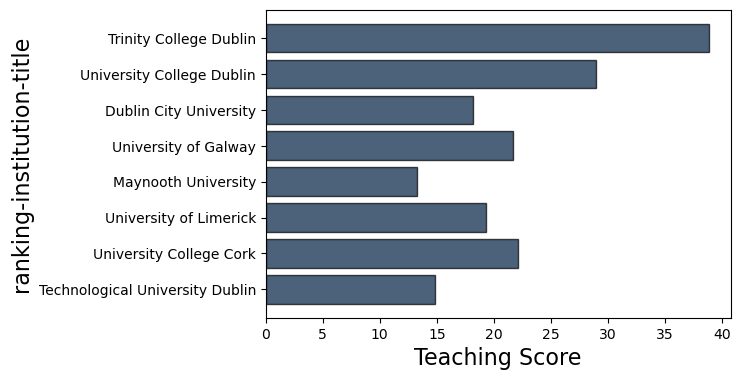

In [16]:
# plot ranking-institution-title on the y-axis and teaching score on the x-axis
ireland.barh("ranking-institution-title", "Teaching Score")

### `tbl.scatter(x_column, y_column)`
#### Good for two columns of numerical data

In [18]:
two_cols = ranking.select("rank", "Teaching Score")

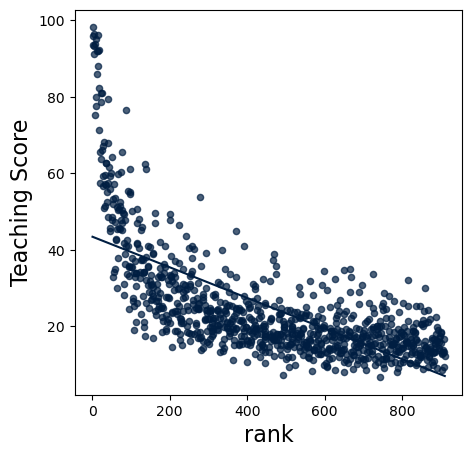

In [19]:
# rank on x-axis, teaching score on y-axis
two_cols.scatter("rank", "Teaching Score", fit_line=True) # optional best fit line

### `tbl.hist(column, bins)`
#### Good for one column of numerical data
- `column`: string \
    name of the column with categories
- `bins`: (Optional) list or int\
    Lower bound for each bin in the histogram or number of bins. If None, bins will be chosen automatically.

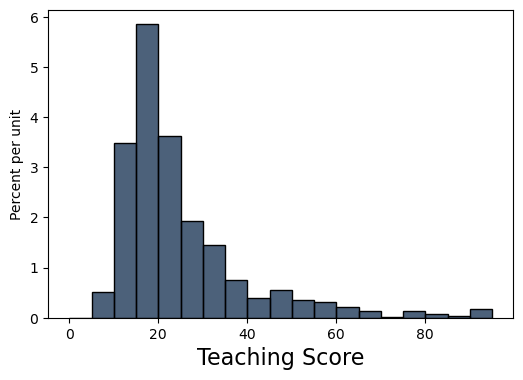

In [20]:
ranking.hist("Teaching Score", bins=np.arange(0, 100, 5)) # bins from 0-100, every 5

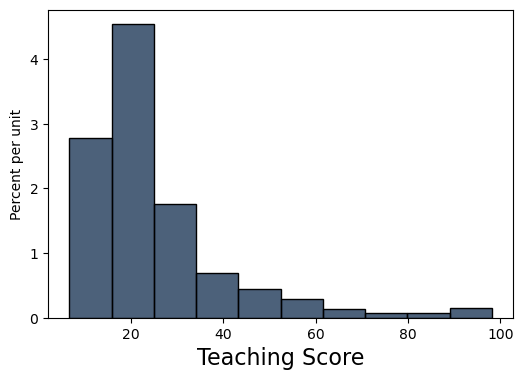

In [21]:
ranking.hist("Teaching Score", bins=10) # 10 bins over the range of the data

### Do you know these other concepts?
* skew
* mean, median, mode
* range